In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from IPython import display
import random
import gym
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
M=128;
dt=1.0/100.0;
T=730;
it=100*730;

w=1.0/15.0;
gamma=.019;
eta=.03;
theta=.56;
A0par=1.0/30.0;

B=np.zeros((M,M));
A0=A0par*np.ones((M,M));
n=np.zeros((M,M));
print np.int(1.0)

1


In [3]:
def update_system(A0,B,n,dt,gamma,eta,theta,w):
    ntemp=np.zeros(n.shape);
    C=np.zeros(n.shape);
    M=n.shape[0]
    A=A0+B;
    for i in range(M):
        for j in range(M):
            
            #loop through criminals and commit crimes or move
            for l in range(np.int(n[i,j])):
                if((1.0-np.exp(-A[i,j]*dt))>np.random.rand()):
                    ntemp[i,j]=ntemp[i,j]-1;
                    C[i,j]=C[i,j]+1;
                else:
                    temp=A[min(i+1,M-1),j]+A[max(i-1,0),j]+A[i,min(j+1,M-1)]+A[i,max(j-1,0)];
                    u=np.random.rand();
                    p1=A[min(i+1,M-1),j]/temp;
                    p2=p1+A[max(i-1,0),j]/temp;
                    p3=p2+A[i,min(j+1,M-1)]/temp;
                    p4=p3+A[i,max(j-1,0)]/temp;
                    if(u<p1):
                        it=min(i+1,M-1);
                        jt=j;
                    if((u<p2) and (u>=p1)):
                        it=max(i-1,0);
                        jt=j;
                    if((u<p3) and (u>=p2)):
                        it=i;
                        jt=min(j+1,M-1);
                    if((u<p4) and (u>=p3)):
                        it=i;
                        jt=max(j-1,0);
                        
                    ntemp[it,jt]=ntemp[it,jt]+1;
                    ntemp[i,j]=ntemp[i,j]-1;
    # new criminal count is old one plus those that moved to minus
    # those that moved from or commited crimes
            
    n=n+ntemp;

    # also add criminals to system
    for i in range(M):
        for j in range(M):
            if((1-np.exp(-gamma*dt))>np.random.rand()):
                n[i,j]=n[i,j]+1;


    #update attractiveness based upon recent crimes
    Btemp=np.copy(B)
    for i in range(M):
        for j in range(M):
            dB=B[i,j]*(1-eta)+(eta/4)*(B[min(i+1,M-1),j]+B[max(i-1,0),j]+B[i,min(j+1,M-1)]+B[i,max(j-1,0)]);
            Btemp[i,j]=theta*C[i,j]+(1.0-w*dt)*dB;
 
    
    B=np.copy(Btemp)

    return C,B,n

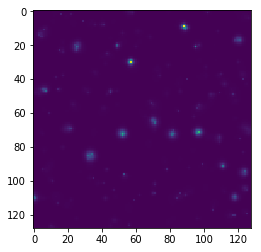

In [ ]:
for k in range(it):
    C,B,n=update_system(A0,B,n,dt,gamma,eta,theta,w)
    if k % 100 == 0:
        plt.clf()
        plt.imshow(B)
        display.clear_output(wait=True)
        display.display(plt.gcf())